# Cargar Datos

In [108]:
import pandas as pd

# Ruta al archivo
ruta = 'dataset/stocks/TWTR.csv'

# Cargar el dataset
df = pd.read_csv(ruta)

# Convertir la columna de fecha a datetime
df['Date'] = pd.to_datetime(df['Date'])

# Establecer la columna de fecha como índice
df.set_index('Date', inplace=True)

# Establecer la frecuencia del índice
df = df.asfreq('ME') # D: Diario, ME: Mensual, YE: Anual

# Comprobar valores nulos
print(df.isnull().sum())

# Relenar valores nulos si existen (interpolación)
if df.isnull().sum().sum() > 0:
    df.interpolate(method='linear', inplace=True) # linear, pchip...

    # Visualizar valores nulos
    print(df.isnull().sum())

# Visualizar el dataset
print(df.head())

Open         23
High         23
Low          23
Close        23
Adj Close    23
Volume       23
dtype: int64
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64
                 Open       High        Low      Close  Adj Close      Volume
Date                                                                         
2013-11-30        NaN        NaN        NaN        NaN        NaN         NaN
2013-12-31  62.360001  65.220001  61.650002  63.650002  63.650002  27814600.0
2014-01-31  63.389999  65.370003  62.650002  64.500000  64.500000  15498800.0
2014-02-28  55.930000  56.000000  54.130001  54.910000  54.910000   8137200.0
2014-03-31  47.549999  47.750000  46.430000  46.669998  46.669998   5794500.0


# Visualización

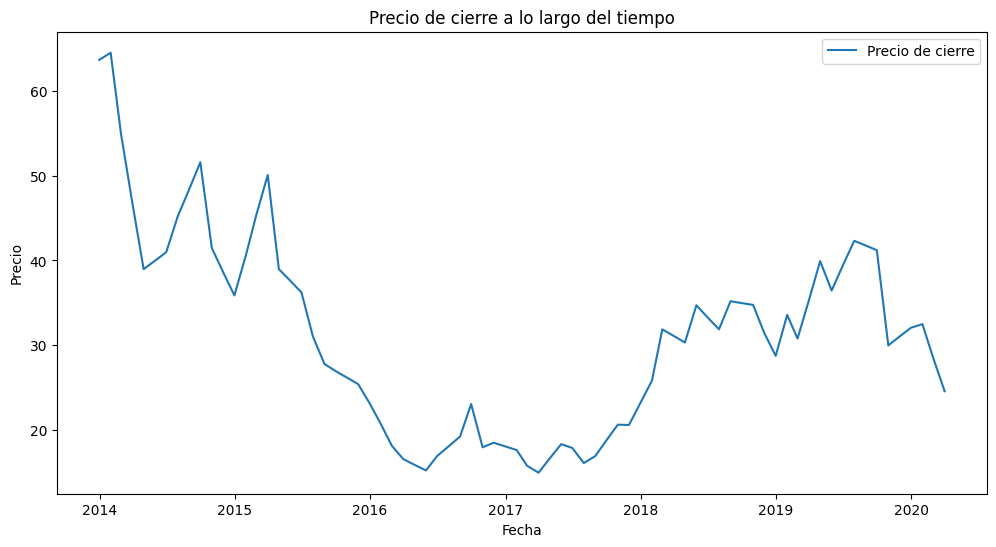

In [109]:
import matplotlib.pyplot as plt

# Graficar el precio de cierre
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Precio de cierre')
plt.title('Precio de cierre a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()

# Descomposición

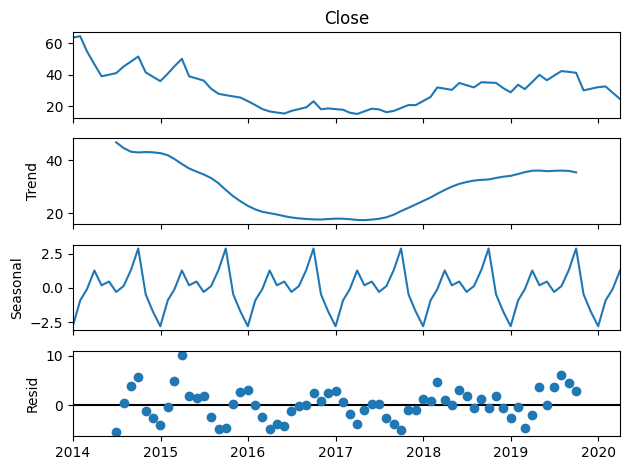

In [110]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomposición de la serie temporal
result = seasonal_decompose(df['Close'].dropna(), model='additive')
result.plot()
plt.show()


# Estacionariedad

In [112]:
from statsmodels.tsa.stattools import adfuller

# Prueba de Dickey-Fuller
result = adfuller(df['Close'].dropna())
print('Estadístico ADF:', result[0])
print('Valor p:', result[1])


Estadístico ADF: -2.89590835474917
Valor p: 0.0458258732221585
